In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint

In [2]:
R = 3
w = 0.175
nv = 1
c = 1  # Speed of light
eps = 1e-8


def n(r):
    
    return (nv+2)/2 + (nv-2)/2 * np.tanh(15 * (r - R) / (4 * w))

def dn(r):

    return (nv-2)/2 * (1/((np.cosh(15/4 * (r-R)/w))**2))*15/(4*w)


In [3]:
def func(f,t):
    
    x  = f[0]
    vx = f[1]
    y  = f[2]
    vy = f[3]  
    z  = f[4]
    vz = f[5]
    
    r = np.sqrt(x**2+y**2+z**2+eps)
    
    
    n_r = n(r)
    v_squared  = (vx**2 + vy**2 + vz**2)
    #v = c/n
    dn_dr = dn(r)/n_r
    
    dxln_n = dn_dr*x /r
    dyln_n = dn_dr*y /r
    dzln_n = dn_dr*z /r
 
    dln_n_dot_v = dxln_n*vx + dyln_n*vy + dzln_n*vz
    
    
    ax = v_squared  * dxln_n - 2*(dln_n_dot_v)*vx
    ay = v_squared  * dyln_n - 2*(dln_n_dot_v)*vy
    az = v_squared  * dzln_n - 2*(dln_n_dot_v)*vz

    
    return [vx,ax,vy,ay,vz,az]

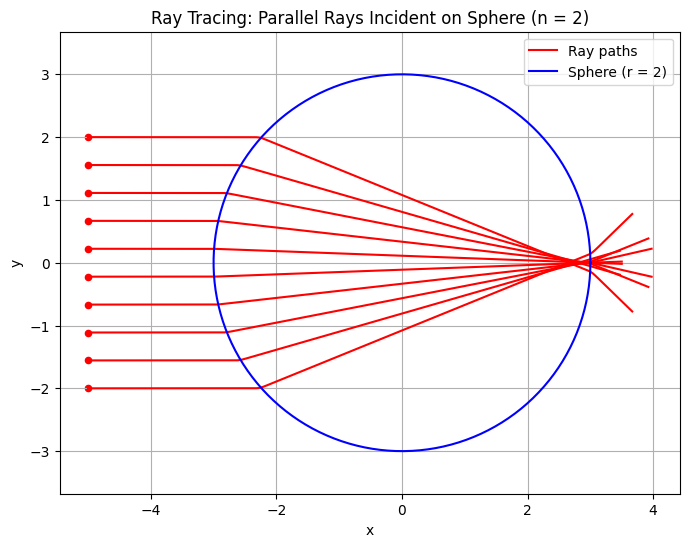

In [4]:
y0_values = np.linspace(-2, 2, 10)
solutions = []

x1_0 = -5
#y1_0 = 1
z1_0 = 0



#max time
tmax = 15
dt = tmax/1000
t = np.linspace(0, tmax, 10000)

x_sphere = -np.sqrt(R**2-y0_values**2)
x_sphere

normal = np.array(list(zip(x_sphere, y0_values)))
snel = []

#Initial conditions

for idx,y1_0 in enumerate(y0_values):
    
    

    r_0 = np.sqrt(x1_0**2 + y1_0**2 + z1_0**2)

    v0 = c / n(r_0)
    k = np.array([1.0, 0.0, 0.0])  # Direction unit vector
    v = v0 * k  # Initial velocity
    
    
    vx1_0 = v[0]
    vy1_0 = v[1]  
    vz1_0 = v[2]
    ini = [x1_0,vx1_0,y1_0,vy1_0,z1_0,vz1_0]
    
    
    sol=odeint(func,ini,t)  
    solutions.append(sol)
    
    velocity1 = np.array([sol[:, 1][0],sol[:, 3][0]])
    velocity2 = np.array([sol[:, 1][3000],sol[:, 3][3000]])    
    alpha1 = np.arccos(np.dot(-velocity1,normal[idx])/(np.sqrt(np.sum(velocity1**2))*R))
    alpha2 =  np.arccos(np.dot(velocity2,normal[idx])/(np.sqrt(np.sum(velocity2**2))*R))


    snel.append(np.sin(alpha1)/np.sin(alpha2))



plt.figure(figsize=(8, 6))
for i, sol in enumerate(solutions):
    plt.plot(sol[:, 0], sol[:, 2], label='Ray paths' if i == 0 else "", color='red')
    plt.scatter([sol[0, 0]], [sol[0, 2]], color='red', s=20)  

# Plot the sphere (r = R)
theta = np.linspace(0, 2 * np.pi, 150)
x_circle = R * np.cos(theta)
y_circle = R * np.sin(theta)
plt.plot(x_circle, y_circle, label='Sphere (r = 2)', color= 'blue')


plt.xlabel('x')
plt.ylabel('y')
plt.title('Ray Tracing: Parallel Rays Incident on Sphere (n = 2)')
plt.grid(True)
plt.legend()
plt.axis('equal')  
plt.show()



In [5]:
velocity = np.sqrt(sol[:, 1]**2 + sol[:, 3]**2)

### $v = c/n$

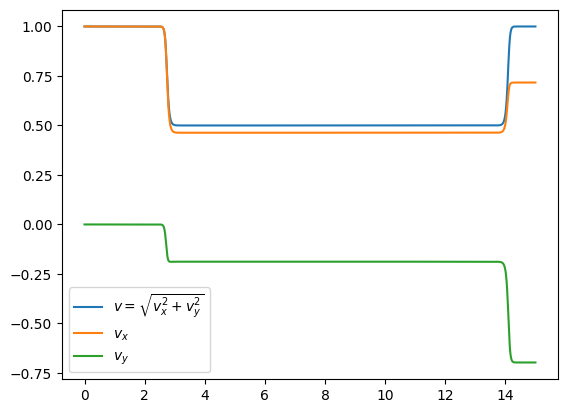

In [6]:
plt.plot(t, velocity, label=r'$v = \sqrt{v_x^2 + v_y^2}$')
plt.plot(t,sol[:, 1], label=r'$v_x$')
plt.plot(t,sol[:, 3], label=r'$v_y$')
plt.legend()


### $\frac{sin \ \alpha _1}{sin \ \alpha _2} = \frac{2}{n_v}$

In [7]:
2/nv

2.0

In [8]:
snel

[np.float64(1.9768319389633533),
 np.float64(1.9838244028313283),
 np.float64(1.9871924842027022),
 np.float64(1.9889003561848595),
 np.float64(1.9896346072665259),
 np.float64(1.9896346072665259),
 np.float64(1.9889003561849303),
 np.float64(1.9871924842026958),
 np.float64(1.9838244028313443),
 np.float64(1.9768319389633533)]

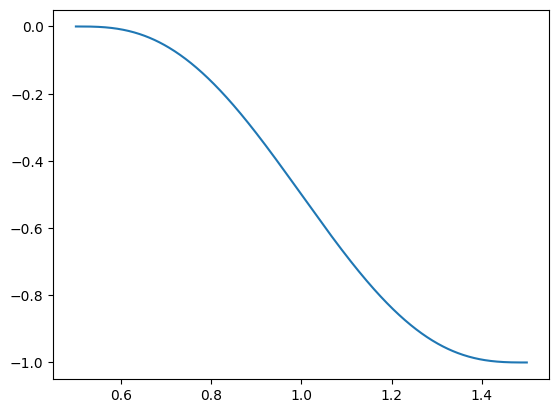

In [9]:

def theta(x):
    return -(0.5 + 15*(x-R)/(8*w) - (5*(x-R)**3) / (w**3) + (6*(x-R)**5) / (w**5))
    
R = 1
w = 1 
x = np.linspace(R-w/2,R+w/2,1000)

plt.plot(x, theta(x))



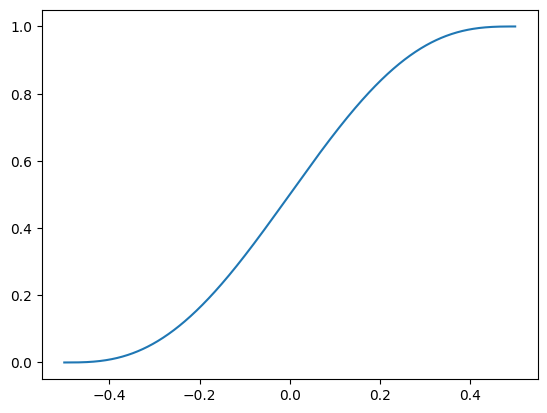

In [10]:
def theta(x):
    return 0.5 + 15*(x)/(8*w) - (5*(x)**3) / (w**3) + (6*(x)**5) / (w**5)
    
R = 1
w = 1 
x = np.linspace(-0.5,0.5,1000)

plt.plot(x, theta(x))



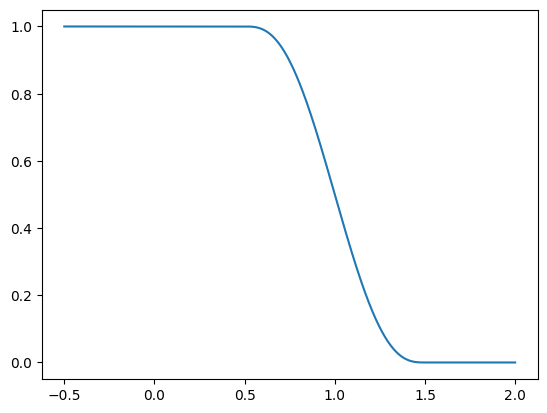

In [11]:

def theta(x):
    x = x-R
    x = np.clip(x, -w/2, w/2)
    return -(0.5 + 15*(x)/(8*w) - (5*(x)**3) / (w**3) + (6*(x)**5) / (w**5))


def n(x):

    return 2*theta(x) + nv *(1-theta(x))

nv = 1
R = 1
w = 1 
x = np.linspace(-0.5,2,1000)

plt.plot(x, n(x))

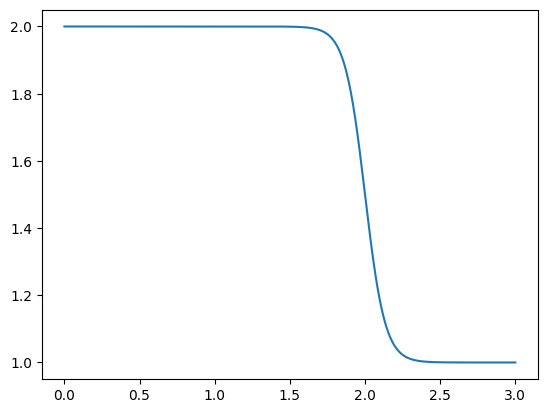

In [12]:
R = 2
w = 0.5
nv = 1

def theta(x):
    return (0.5 + 0.5 * np.tanh(15 * (x - R) / (4 * w)))

def n(x):
    return nv * theta(x) + 2 * (1 - theta(x))

x = np.linspace(0, 3, 1000)
plt.plot(x, n(x))


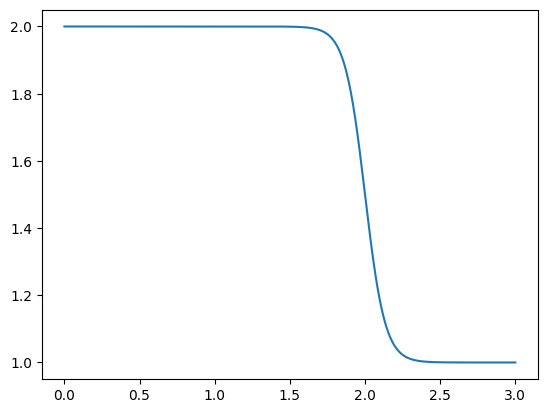

In [13]:
R = 2
w = 0.5
nv = 1


def n(x):
    return (nv+2)/2 + (nv-2)/2 * np.tanh(15 * (x - R) / (4 * w))
x = np.linspace(0, 3, 1000)
plt.plot(x, n(x))
